<a href="https://colab.research.google.com/github/diem-ai/movie-recommender/blob/master/HybridRecommendationModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
# This will prompt for authorization.
# authorization code: 4/OwErfUj6QceGXhIGx_RWv0MKclb9rilw8UsJnZqFbSez-QS8zQ399JU
drive.mount('/content/drive')

#https://drive.google.com/open?id=1uGOD2rFYVL9mods0KIpU_oY2Ye6fl8KE

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:

!pip install PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)





     |████████████████████████████████| 993kB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
#https://drive.google.com/open?id=1uGOD2rFYVL9mods0KIpU_oY2Ye6fl8KE
my_module = drive.CreateFile({'id':'1uGOD2rFYVL9mods0KIpU_oY2Ye6fl8KE'})
my_module.GetContentFile('recommender.py')
#your_module = drive.CreateFile({'id':'recommender'})
#from google.colab import files
#src = list(files.upload().values())[0]
#open('recommender.py','wb').write(src)
#import content.drive.My Drive.Test.recommender

#https://drive.google.com/open?id=1uGOD2rFYVL9mods0KIpU_oY2Ye6fl8KE

In [5]:
# Import library
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import json
# Parse the stringified features into their corresponding python objects
from ast import literal_eval
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import recommender
from recommender import Utility as utility
from recommender import Similarity as similarity
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
#!ls "/content/drive/My Drive/Test"

#### 1. Reading data

In [7]:
# define function
#p_ratings = pd.read_csv"/content/drive/My Drive/Test/ratings.csv") #pd.read_csv("https://raw.githubusercontent.com/diem-ai/colab4test/master/data/ratings_small.csv")
movies = pd.read_csv("/content/drive/My Drive/Test/movies_metadata.csv")
credits = pd.read_csv("/content/drive/My Drive/Test/credits.csv")
keywords = pd.read_csv("/content/drive/My Drive/Test/keywords.csv")
ratings = pd.read_csv("/content/drive/My Drive/Test/ratings.csv")


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
print(movies.columns)

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')


In [9]:
print(credits.columns)
print(credits.head(3))

Index(['cast', 'crew', 'id'], dtype='object')
                                                cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   

                                                crew     id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  


In [10]:
print(keywords.columns)
print(keywords.head(3))

Index(['id', 'keywords'], dtype='object')
      id                                           keywords
0    862  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1   8844  [{'id': 10090, 'name': 'board game'}, {'id': 1...
2  15602  [{'id': 1495, 'name': 'fishing'}, {'id': 12392...


In [11]:
print(keywords.columns)
print(keywords.head(3))

Index(['id', 'keywords'], dtype='object')
      id                                           keywords
0    862  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1   8844  [{'id': 10090, 'name': 'board game'}, {'id': 1...
2  15602  [{'id': 1495, 'name': 'fishing'}, {'id': 12392...


In [12]:
print(ratings.columns)
print(ratings.head(3))

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
   userId  movieId  rating     timestamp
0       1      110     1.0  1.425942e+09
1       1      147     4.5  1.425942e+09
2       1      858     5.0  1.425942e+09


#### 2. Preprocesing Data


In [0]:
# Filter out invalid rows in movies dataset and convert id to interger type so that we can merge movies dataset with others

movies = movies.drop(movies[movies['id']=='1997-08-20'].index)
movies = movies.drop(movies[movies['id']=='2012-09-29'].index)
movies = movies.drop(movies[movies['id']=='2014-01-01'].index)

movies['id'] = movies['id'].astype(int)
credits['id'] = credits['id'].astype(int)
keywords['id'] = keywords['id'].astype(int)

#movies[movies['id'] == '1997-08-20']
#19730

#movies['id'] = movies['id'].astype(int)

genres, cast, crew, keywords in movies, credits and keywords datasets are string json objects. We only take out relevant words for our recommendation model

In [0]:
# genres column is a json string object. We will take out genre values only.
movies['genres'] = movies['genres'].apply(literal_eval)

In [0]:
credits['cast'] = credits['cast'].apply(lambda x : literal_eval(x))

In [0]:
credits['crew'] = credits['crew'].apply(lambda x : literal_eval(x))

In [0]:
keywords['keywords'] = keywords['keywords'].apply(lambda x : literal_eval(x))

In [0]:
#get genre only
movies['genres'] = movies['genres'].apply(lambda x : utility.get_genre(x))
credits['cast'] = credits['cast'].apply(lambda x : utility.get_cast(x))
credits['crew'] = credits['crew'].apply(lambda x : utility.get_cast(x))
keywords['keywords'] = keywords['keywords'].apply(lambda x : utility.get_genre(x))
keywords['keywords'] = utility.preprocess_series_text(keywords['keywords'])

Revew above columns after processing

In [19]:
credits.head()

,cast,crew,id
0,tomhanks timallen donrickles jimvarney wallace...,johnlasseter josswhedon andrewstanton joelcohe...,862
1,robinwilliams jonathanhyde kirstendunst bradle...,larryj.franco jonathanhensleigh jameshorner jo...,8844
2,waltermatthau jacklemmon ann-margret sophialor...,howarddeutch markstevenjohnson markstevenjohns...,15602
3,whitneyhouston angelabassett lorettadevine lel...,forestwhitaker ronaldbass ronaldbass ezraswerd...,31357
4,stevemartin dianekeaton martinshort kimberlywi...,alansilvestri elliotdavis nancymeyers nancymey...,11862


In [20]:
keywords.head()

,id,keywords
0,862,jealousy toy boy friendship friends rivalry bo...
1,8844,board game disappearance base child book new h...
2,15602,fish best friend duringcreditsstinger old men
3,31357,base novel interracial relationship single mot...
4,11862,baby midlife crisis confidence age daughter mo...


In [21]:
movies[['id','title', 'genres', 'vote_count', 'vote_average']].head(3)

,id,title,genres,vote_count,vote_average
0,862,Toy Story,animation comedy family,5415.0,7.7
1,8844,Jumanji,adventure fantasy family,2413.0,6.9
2,15602,Grumpier Old Men,romance comedy,92.0,6.5


In [0]:
# Save processed movies dataset for evaluation purpose
p_movies = movies[['id', 'title', 'genres', 'vote_count', 'vote_average']]
p_movies.to_csv('/content/drive/My Drive/Test/normalised_movies.csv', index=True, header=True)

#### 3 . Building collaborative filtering mode by combing movies and ratings dataset. The system generated uses only information about rating profiles for different users on items.

In [0]:
ratings = ratings[['userId', 'movieId', 'rating']].merge(movies[['id', 'title', 'genres', 'vote_count', 'vote_average']], left_on='movieId', right_on='id', how='left')

In [23]:
# see 5 top items after merging
ratings = ratings.sort_values(by=['vote_average'], ascending=False)
ratings.head()

,userId,movieId,rating,id,title,genres,vote_count,vote_average
10752969,111010,73183,4.0,73183.0,"The Haunted World of Edward D. Wood, Jr.",documentary,1.0,10.0
11199893,116004,72178,2.5,72178.0,One Night Only,comedy,1.0,10.0
7973523,82193,5731,5.0,5731.0,Summer City,thriller drama,1.0,10.0
6843597,70648,5731,4.0,5731.0,Summer City,thriller drama,1.0,10.0
12139246,125846,97593,3.5,97593.0,Shark Kill,tv movie adventure,1.0,10.0


In [24]:
#drop movieId column. it is the same with id
ratings = ratings.drop(columns=['movieId'])
#remove duplicated movies:
ratings = ratings.drop_duplicates(['id'], keep='first')
ratings.head()

,userId,rating,id,title,genres,vote_count,vote_average
10752969,111010,4.0,73183.0,"The Haunted World of Edward D. Wood, Jr.",documentary,1.0,10.0
11199893,116004,2.5,72178.0,One Night Only,comedy,1.0,10.0
7973523,82193,5.0,5731.0,Summer City,thriller drama,1.0,10.0
12139246,125846,3.5,97593.0,Shark Kill,tv movie adventure,1.0,10.0
4454047,45811,3.5,139215.0,Garrison Keillor: The Man on the Radio in the ...,,1.0,10.0


In [25]:
ratings = ratings.dropna()
ratings['id'] = ratings['id'].astype(int)
ratings.head(2)

,userId,rating,id,title,genres,vote_count,vote_average
10752969,111010,4.0,73183,"The Haunted World of Edward D. Wood, Jr.",documentary,1.0,10.0
11199893,116004,2.5,72178,One Night Only,comedy,1.0,10.0


In [0]:
#Build factorization matrix:
## reshape the ratings dataframe: index is movie id, rows are ratings and columns is user id
rating_matrix = ratings.pivot(index = 'id', columns ='userId', values = 'rating').fillna(0)


In [27]:
n_components = rating_matrix.shape[1]
print("Best number for TSVD: {} ".format(n_components))
svd = TruncatedSVD(n_components=(n_components-1))
latent_rating = svd.fit_transform(rating_matrix)
print(latent_rating[:5])

Best number for TSVD: 3722 
[[-1.36898570e-14 -8.28659608e-17  2.03576453e-16 ... -2.95097074e-18
   2.34362560e-18  6.83080062e-18]
 [-1.90547539e-15  8.01665282e-16 -1.39668985e-16 ...  2.12689353e-18
  -5.75434462e-18 -5.61916821e-18]
 [-2.52900965e-17  9.60912284e-16  3.01972225e-16 ... -5.62933139e-18
  -1.63354312e-17  8.03406289e-18]
 [ 5.74141872e-16 -2.52289248e-16  7.31836436e-15 ... -1.48014540e-17
   1.03372705e-17  4.35258139e-17]
 [-1.19101960e-15  1.14498801e-15  5.76994887e-16 ... -1.42563374e-18
   9.02591833e-18 -6.69054833e-18]]


In [0]:
#save matrix as ratings_matrix.csv for the model validation
latent_matrix_df = pd.DataFrame(latent_rating, index=rating_matrix.index.tolist())
latent_matrix_df.to_csv("/content/drive/My Drive/Test/ratings_matrix.csv", index=True, header=True)

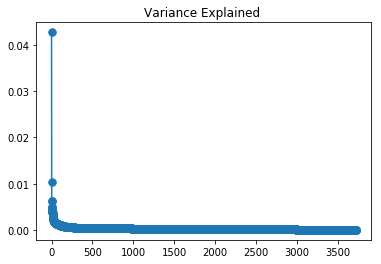

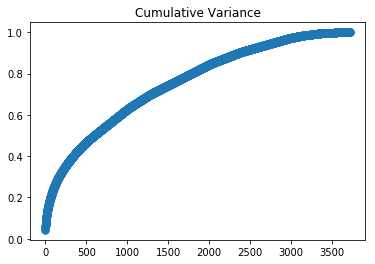

In [29]:
# Plot variance and cumulative variance for ratings based system
expl = svd.explained_variance_ratio_
plt.plot(expl, '.-', ms=15)
plt.title('Variance Explained ');
plt.show()

plt.plot(np.cumsum(expl), '.-', ms=15)
plt.title('Cumulative Variance');
plt.show()

In [30]:
# Make few tests with rating user based recommendation:
#rating_matrix[278]
#movies[movies['id'] == 278]
#latent_matrix_df = pd.read_csv("/content/drive/My Drive/Test/ratings_matrix.csv", index_col=0) 
features = ['title', 'genres', 'vote_average','score']

movie_id = utility.get_movie_by_title(movies, "GoldenEye")
print("movie id {}: ".format(movie_id))

similarity.make_recommendation(movie_id, latent_matrix_df, movies, features, 5)


movie id 710: 
               title                         genres  vote_average  \
710       Last Dance                 drama thriller           5.6   
2332  At First Sight                  drama romance           5.9   
691             Cosi                 comedy romance           7.1   
217     Castle Freak  thriller drama horror mystery           5.8   

             score  
710   1.000000e+00  
2332  1.000000e+00  
691   1.000000e+00  
217   3.693157e-15  


#### 4 . Building Content based Model. The matrix consists of genres, starring and crew. people usually look for movies with same stars and screw

In [0]:
#left join movies data with credits
content_df = movies[['id', 'title', 'genres']].merge(credits, left_on='id', right_on='id', how='left')

In [0]:
#left join again with keywords dataset
content_df = content_df.merge(keywords, left_on='id', right_on='id', how='left')

In [33]:
content_df.head(3)

,id,title,genres,cast,crew,keywords
0,862,Toy Story,animation comedy family,tomhanks timallen donrickles jimvarney wallace...,johnlasseter josswhedon andrewstanton joelcohe...,jealousy toy boy friendship friends rivalry bo...
1,8844,Jumanji,adventure fantasy family,robinwilliams jonathanhyde kirstendunst bradle...,larryj.franco jonathanhensleigh jameshorner jo...,board game disappearance base child book new h...
2,15602,Grumpier Old Men,romance comedy,waltermatthau jacklemmon ann-margret sophialor...,howarddeutch markstevenjohnson markstevenjohns...,fish best friend duringcreditsstinger old men


In [34]:
#create a new feature tag = genres + cast + crew + keywords
content_df['tag'] = content_df['genres'] + ' ' + content_df['cast'] + ' ' + content_df['crew'] + ' ' + content_df['keywords']
content_df = content_df.reset_index()
content_df = content_df.fillna("")
content_df.head(3)

,index,id,title,genres,cast,crew,keywords,tag
0,0,862,Toy Story,animation comedy family,tomhanks timallen donrickles jimvarney wallace...,johnlasseter josswhedon andrewstanton joelcohe...,jealousy toy boy friendship friends rivalry bo...,animation comedy family tomhanks timallen donr...
1,1,8844,Jumanji,adventure fantasy family,robinwilliams jonathanhyde kirstendunst bradle...,larryj.franco jonathanhensleigh jameshorner jo...,board game disappearance base child book new h...,adventure fantasy family robinwilliams jonatha...
2,2,15602,Grumpier Old Men,romance comedy,waltermatthau jacklemmon ann-margret sophialor...,howarddeutch markstevenjohnson markstevenjohns...,fish best friend duringcreditsstinger old men,romance comedy waltermatthau jacklemmon ann-ma...


In [0]:
# Build TF-IDF matrix with content_df
vectorizer = TfidfVectorizer(max_features=2000)
content_matrix = vectorizer.fit_transform(content_df['tag'])

#tfidf_df = pd.DataFrame(content_matrix.toarray(), index=movies.index.tolist())


In [36]:
# we have 2000 words in matrix
vectorizer.vocabulary_
#tfidf_df.head()
#movies[movies['id'] == 710]
#print(np.array(tfidf_df.loc(0)).reshape(1, -1))

{'animation': 74,
 'comedy': 354,
 'family': 588,
 'tomhanks': 1822,
 'wallaceshawn': 1902,
 'johnmorris': 976,
 'johnlasseter': 970,
 'connell': 362,
 'jealousy': 903,
 'toy': 1835,
 'boy': 192,
 'friendship': 650,
 'rivalry': 1509,
 'new': 1302,
 'come': 352,
 'life': 1111,
 'adventure': 15,
 'fantasy': 590,
 'robinwilliams': 1545,
 'patriciaclarkson': 1356,
 'jameshorner': 880,
 'jamesd': 872,
 'robertw': 1540,
 'thomase': 1801,
 'ackerman': 3,
 'board': 176,
 'game': 658,
 'disappearance': 477,
 'base': 126,
 'child': 297,
 'book': 186,
 'home': 788,
 'giant': 690,
 'romance': 1559,
 'waltermatthau': 1910,
 'jacklemmon': 855,
 'ann': 77,
 'darylhannah': 409,
 'burgessmeredith': 224,
 'kevinpollak': 1052,
 'fish': 612,
 'best': 145,
 'friend': 649,
 'duringcreditsstinger': 512,
 'old': 1327,
 'drama': 502,
 'wesleysnipes': 1929,
 'forestwhitaker': 624,
 'novel': 1315,
 'interracial': 838,
 'relationship': 1473,
 'single': 1674,
 'mother': 1265,
 'divorce': 483,
 'stevemartin': 1730,

In [37]:
"""
print(len(movies.index.tolist()))
print(len(vectorizer.get_feature_names()[1:20]))
print(content_matrix.shape)

"""

'\nprint(len(movies.index.tolist()))\nprint(len(vectorizer.get_feature_names()[1:20]))\nprint(content_matrix.shape)\n\n'

In [38]:
#content_matrix.shape
vectorizer.get_feature_names()[1:10]

['abuse',
 'accident',
 'ackerman',
 'action',
 'actor',
 'actress',
 'adamsandler',
 'addict',
 'addiction']

In [39]:
print(movies.shape)
print(content_df.shape)

(45463, 24)
(46629, 8)


In [40]:
n_components = content_matrix.shape[1]
print("Best number for TSVD: {} ".format(n_components))
svd = TruncatedSVD(n_components=(n_components-1))
latent_content = svd.fit_transform(content_matrix)
print(latent_content.shape)


Best number for TSVD: 2000 
(46629, 1999)


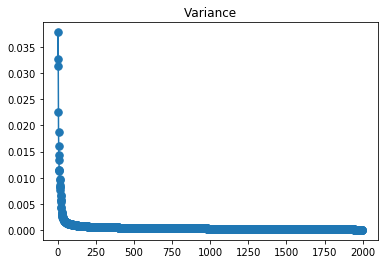

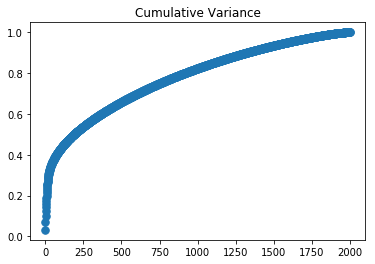

In [41]:
# plot variance and cumulative variance for content based matrix
expl = svd.explained_variance_ratio_
plt.plot(expl, '.-', ms=15)
plt.title('Variance');
plt.show()

plt.plot(np.cumsum(expl), '.-', ms=15)
plt.title('Cumulative Variance');
plt.show()

In [0]:
#print(vectorizer.get_feature_names()[:100])
#print(content_matrix.shape)
#print(movies.shape)
content_matrix_df = pd.DataFrame(latent_content, index=content_df.index.tolist())
content_matrix_df.to_csv("/content/drive/My Drive/Test/content_matrix.csv", index=True, header=True)

In [43]:
# Make few test with content based model
idx_movie = utility.get_idx_by_title(movies, "GoldenEye")
print("movie id {}: ".format(idx_movie))
features = ['title', 'genres','vote_average','score']
similarity.make_recommendation(idx_movie, content_matrix_df, movies, features, 5)

movie id 9: 
              title                         genres  vote_average     score
7362       Irma Vep            drama comedy horror           6.3  0.481568
7363  Buck Privates                         comedy           6.7  0.459933
5764    Adaptation.             comedy crime drama           7.3  0.449810
3895       The Gift  horror drama thriller mystery           6.4  0.446491


In [0]:
#!jupyter nbconvert --to PDF "RecommendUserSimilarity.ipynb"

In [45]:
#rating_matrix[278]
"""



idx_movie = utility.get_idx_by_title(movies, "Grumpier Old Men")
print("movie id {}: ".format(idx_movie))

similarity.make_recommendation(idx_movie, latent_matrix_df, movies, features, 10)

"""


'\n\n\n\nidx_movie = utility.get_idx_by_title(movies, "Grumpier Old Men")\nprint("movie id {}: ".format(idx_movie))\n\nsimilarity.make_recommendation(idx_movie, latent_matrix_df, movies, features, 10)\n\n'

In [46]:
#rating_matrix[278]

"""



seed_movie = utility.get_idx_by_title(movies, "Father of the Bride Part II")
print("movie id {}: ".format(seed_movie))


similarity.make_recommendation(seed_movie, latent_matrix_df, movies, features, 10)

"""



'\n\n\n\nseed_movie = utility.get_idx_by_title(movies, "Father of the Bride Part II")\nprint("movie id {}: ".format(seed_movie))\n\n\nsimilarity.make_recommendation(seed_movie, latent_matrix_df, movies, features, 10)\n\n'